In [209]:
import rate
import numpy as np
import optimization
from matplotlib import pyplot as plt, colors
import dm_statistics
import scipy.constants as const
from scipy.interpolate import interp1d
from scipy.optimize import brentq
import scipy.constants as const
from matplotlib import ticker


In [113]:
days=np.array([0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10,20,50,100])

In [114]:
rateHz=100
excluded=[]
for day in days:
    t=day*24*60*60
    n=t*rateHz
    excluded.append((dm_statistics.poisson_1sided_interval(n,0.2)-n)/t)

Text(0.5, 0, 'Exposure Time (Days)')

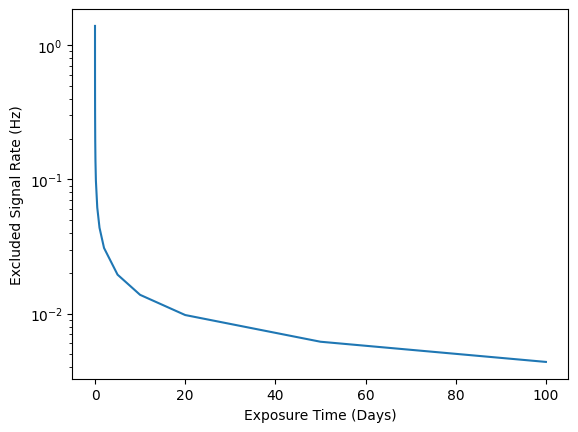

In [115]:
plt.plot(days,excluded)
plt.yscale('log')
plt.ylabel('Excluded Signal Rate (Hz)')
plt.xlabel('Exposure Time (Days)')
#plt.xscale('log')

In [116]:
t0=1
dT=[days[0]*24*60*60-t0]
for i in range(1,len(days)):
    dT.append((days[i]-days[i-1])*24*60*60)

In [117]:
energyMatsu, __ = dm_statistics.n_vs_eV(kappa=1e-11,fDM=1,hitRate=0.75)
wave=const.h*const.c/(energyMatsu*1e-9)*6.2*1e18
maskEx = wave<max(optimization.qeData("excelitas_qe.csv")[0])
energyExcel = energyMatsu[maskEx]
maskLC = wave<max(optimization.qeData("laser-components_qe.csv")[0])
energyLC = energyMatsu[maskLC]
energyMap = {"matsu":energyMatsu,"excelitas":energyExcel,"TES":energyExcel,"LC":energyLC} 


In [118]:
kappas=[]
for dayoff in days:
    k=[]
    for dayon in days:
        print(dayon)
        print(dayoff)
        muS=dm_statistics.upper_limitB(rateHz,dayon,dayoff,mu_=rateHz)
        energy=energyMap['TES']
        kAnalytic = np.zeros(len(energy))
        for j,e in enumerate(energy):
            kAnalytic[j]=rate.get_kappa(j,muS,dayon,sensor='TES',percentile=100)
        k.append(min(kAnalytic))
    kappas.append(k)

0.001
0.001
100
100
non0, noff0: 8640.0 8640.0
non, noff: 8640.0 8640.0
the signal at which the median no-signal dataset is excluded at 90% confidence is 168.46833099439937
0.002
0.001
100
100
non0, noff0: 17280.0 8640.0
non, noff: 17280.0 8640.0
the signal at which the median no-signal dataset is excluded at 90% confidence is 291.24620709901717
0.005
0.001
100
100
non0, noff0: 43200.0 8640.0
non, noff: 43200.0 8640.0
the signal at which the median no-signal dataset is excluded at 90% confidence is 650.276733614381
0.01
0.001
100
100
non0, noff0: 86400.0 8640.0
non, noff: 86400.0 8640.0
the signal at which the median no-signal dataset is excluded at 90% confidence is 1244.448061770605
0.02
0.001
100
100
non0, noff0: 172800.0 8640.0
non, noff: 172800.0 8640.0
the signal at which the median no-signal dataset is excluded at 90% confidence is 2430.894995908238
0.05
0.001
100
100
non0, noff0: 432000.0 8640.0
non, noff: 432000.0 8640.0
the signal at which the median no-signal dataset is excl

0.001
0.01
100
100
non0, noff0: 8640.0 86400.0
non, noff: 8640.0 86400.0
the signal at which the median no-signal dataset is excluded at 90% confidence is 125.43022418750827
0.002
0.01
100
100
non0, noff0: 17280.0 86400.0
non, noff: 17280.0 86400.0
the signal at which the median no-signal dataset is excluded at 90% confidence is 184.98238030735598
0.005
0.01
100
100
non0, noff0: 43200.0 86400.0
non, noff: 43200.0 86400.0
the signal at which the median no-signal dataset is excluded at 90% confidence is 326.5045878666255
0.01
0.01
100
100
non0, noff0: 86400.0 86400.0
non, noff: 86400.0 86400.0
the signal at which the median no-signal dataset is excluded at 90% confidence is 532.7322476670463
0.02
0.01
100
100
non0, noff0: 172800.0 86400.0
non, noff: 172800.0 86400.0
the signal at which the median no-signal dataset is excluded at 90% confidence is 922.171213043432
0.05
0.01
100
100
non0, noff0: 432000.0 86400.0
non, noff: 432000.0 86400.0
the signal at which the median no-signal dataset i

0.001
0.1
100
100
non0, noff0: 8640.0 864000.0
non, noff: 8640.0 864000.0
the signal at which the median no-signal dataset is excluded at 90% confidence is 120.25905054991091
0.002
0.1
100
100
non0, noff0: 17280.0 864000.0
non, noff: 17280.0 864000.0
the signal at which the median no-signal dataset is excluded at 90% confidence is 170.6776419489546
0.005
0.1
100
100
non0, noff0: 43200.0 864000.0
non, noff: 43200.0 864000.0
the signal at which the median no-signal dataset is excluded at 90% confidence is 273.4638630904344
0.01
0.1
100
100
non0, noff0: 86400.0 864000.0
non, noff: 86400.0 864000.0
the signal at which the median no-signal dataset is excluded at 90% confidence is 395.5769064857831
0.02
0.1
100
100
non0, noff0: 172800.0 864000.0
non, noff: 172800.0 864000.0
the signal at which the median no-signal dataset is excluded at 90% confidence is 584.0158314127727
0.05
0.1
100
100
non0, noff0: 432000.0 864000.0
non, noff: 432000.0 864000.0
the signal at which the median no-signal dat

0.001
1.0
100
100
non0, noff0: 8640.0 8640000.0
non, noff: 8640.0 8640000.0
the signal at which the median no-signal dataset is excluded at 90% confidence is 119.72935855935647
0.002
1.0
100
100
non0, noff0: 17280.0 8640000.0
non, noff: 17280.0 8640000.0
the signal at which the median no-signal dataset is excluded at 90% confidence is 169.179522953887
0.005
1.0
100
100
non0, noff0: 43200.0 8640000.0
non, noff: 43200.0 8640000.0
the signal at which the median no-signal dataset is excluded at 90% confidence is 267.5755870867739
0.01
1.0
100
100
non0, noff0: 86400.0 8640000.0
non, noff: 86400.0 8640000.0
the signal at which the median no-signal dataset is excluded at 90% confidence is 379.11868813368653
0.02
1.0
100
100
non0, noff0: 172800.0 8640000.0
non, noff: 172800.0 8640000.0
the signal at which the median no-signal dataset is excluded at 90% confidence is 538.5685918110673
0.05
1.0
100
100
non0, noff0: 432000.0 8640000.0
non, noff: 432000.0 8640000.0
the signal at which the median n

0.001
10.0
100
100
non0, noff0: 8640.0 86400000.0
non, noff: 8640.0 86400000.0
the signal at which the median no-signal dataset is excluded at 90% confidence is 119.67624451304835
0.002
10.0
100
100
non0, noff0: 17280.0 86400000.0
non, noff: 17280.0 86400000.0
the signal at which the median no-signal dataset is excluded at 90% confidence is 169.02897324072097
0.005
10.0
100
100
non0, noff0: 43200.0 86400000.0
non, noff: 43200.0 86400000.0
the signal at which the median no-signal dataset is excluded at 90% confidence is 266.9795250572586
0.01
10.0
100
100
non0, noff0: 86400.0 86400000.0
non, noff: 86400.0 86400000.0
the signal at which the median no-signal dataset is excluded at 90% confidence is 377.43307457789683
0.02
10.0
100
100
non0, noff0: 172800.0 86400000.0
non, noff: 172800.0 86400000.0
the signal at which the median no-signal dataset is excluded at 90% confidence is 533.8099148158481
0.05
10.0
100
100
non0, noff0: 432000.0 86400000.0
non, noff: 432000.0 86400000.0
the signal a

0.001
100.0
100
100
non0, noff0: 8640.0 864000000.0
non, noff: 8640.0 864000000.0
the signal at which the median no-signal dataset is excluded at 90% confidence is 119.6711207578815
0.002
100.0
100
100
non0, noff0: 17280.0 864000000.0
non, noff: 17280.0 864000000.0
the signal at which the median no-signal dataset is excluded at 90% confidence is 169.01416826793647
0.005
100.0
100
100
non0, noff0: 43200.0 864000000.0
non, noff: 43200.0 864000000.0
the signal at which the median no-signal dataset is excluded at 90% confidence is 266.9202010308733
0.01
100.0
100
100
non0, noff0: 86400.0 864000000.0
non, noff: 86400.0 864000000.0
the signal at which the median no-signal dataset is excluded at 90% confidence is 377.2640699557193
0.02
100.0
100
100
non0, noff0: 172800.0 864000000.0
non, noff: 172800.0 864000000.0
the signal at which the median no-signal dataset is excluded at 90% confidence is 533.3323644103832
0.05
100.0
100
100
non0, noff0: 432000.0 864000000.0
non, noff: 432000.0 86400000

TypeError: __init__() got an unexpected keyword argument 'textalign'

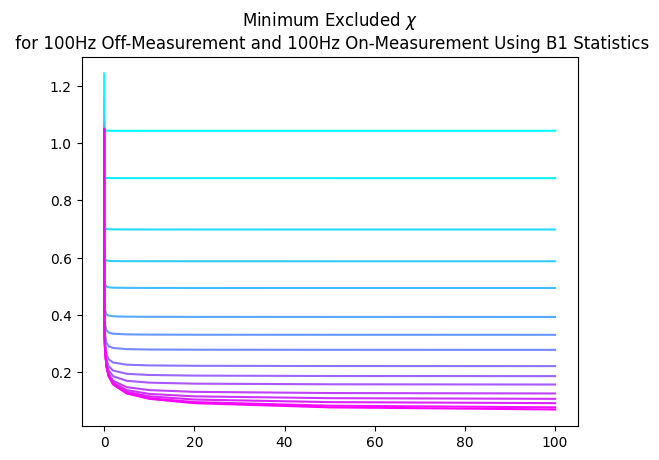

In [139]:
cmap = plt.cm.cool
norm = colors.LogNorm(vmin=0.001, vmax=100)
for i in range(0,len(days)):
    plt.plot(days,np.array(kappas[i])*1e11,color=cmap(norm(days[i])))
 
plt.title('Minimum Excluded $\chi$ \n for 100Hz Off-Measurement and 100Hz On-Measurement Using B1 Statistics')
plt.legend(days,title='Off Measurement Time [Days]',loc=3,fontsize=6,textalign='left')
plt.xscale('log')
plt.xlabel('On Measurement Time [Days]')
plt.ylabel('Minimum Excluded $\chi$ [$10^{-11}$]')
fig = plt.gcf()
fig.set_size_inches(10, 7)

In [121]:
print(np.array(kappas))

[[1.24331202e-11 1.15594225e-11 1.09240858e-11 1.06858576e-11
  1.05606123e-11 1.04833064e-11 1.04571595e-11 1.04440133e-11
  1.04361021e-11 1.04334611e-11 1.04321397e-11 1.04313469e-11
  1.04310822e-11 1.04309501e-11 1.04308725e-11 1.04308492e-11]
 [1.15811301e-11 1.04549041e-11 9.55510537e-12 9.19052885e-12
  8.99088942e-12 8.86448933e-12 8.82114264e-12 8.79923011e-12
  8.78600447e-12 8.78158278e-12 8.77936932e-12 8.77804072e-12
  8.77759714e-12 8.77737633e-12 8.77724459e-12 8.77720491e-12]
 [1.09608110e-11 9.57086395e-12 8.31444959e-12 7.73421496e-12
  7.38760047e-12 7.15385588e-12 7.07063523e-12 7.02790649e-12
  7.00189302e-12 6.99315752e-12 6.98877744e-12 6.98614564e-12
  6.98526755e-12 6.98482884e-12 6.98456689e-12 6.98448104e-12]
 [1.07280823e-11 9.21236593e-12 7.74070717e-12 6.99158255e-12
  6.50446797e-12 6.15010356e-12 6.01720558e-12 5.94733186e-12
  5.90420200e-12 5.88961413e-12 5.88227950e-12 5.87786569e-12
  5.87639195e-12 5.87565521e-12 5.87521374e-12 5.87506768e-12]
 [1.

[[1.e-03 2.e-03 5.e-03 1.e-02 2.e-02 5.e-02 1.e-01 2.e-01 5.e-01 1.e+00
  2.e+00 5.e+00 1.e+01 2.e+01 5.e+01 1.e+02]
 [1.e-03 2.e-03 5.e-03 1.e-02 2.e-02 5.e-02 1.e-01 2.e-01 5.e-01 1.e+00
  2.e+00 5.e+00 1.e+01 2.e+01 5.e+01 1.e+02]
 [1.e-03 2.e-03 5.e-03 1.e-02 2.e-02 5.e-02 1.e-01 2.e-01 5.e-01 1.e+00
  2.e+00 5.e+00 1.e+01 2.e+01 5.e+01 1.e+02]
 [1.e-03 2.e-03 5.e-03 1.e-02 2.e-02 5.e-02 1.e-01 2.e-01 5.e-01 1.e+00
  2.e+00 5.e+00 1.e+01 2.e+01 5.e+01 1.e+02]
 [1.e-03 2.e-03 5.e-03 1.e-02 2.e-02 5.e-02 1.e-01 2.e-01 5.e-01 1.e+00
  2.e+00 5.e+00 1.e+01 2.e+01 5.e+01 1.e+02]
 [1.e-03 2.e-03 5.e-03 1.e-02 2.e-02 5.e-02 1.e-01 2.e-01 5.e-01 1.e+00
  2.e+00 5.e+00 1.e+01 2.e+01 5.e+01 1.e+02]
 [1.e-03 2.e-03 5.e-03 1.e-02 2.e-02 5.e-02 1.e-01 2.e-01 5.e-01 1.e+00
  2.e+00 5.e+00 1.e+01 2.e+01 5.e+01 1.e+02]
 [1.e-03 2.e-03 5.e-03 1.e-02 2.e-02 5.e-02 1.e-01 2.e-01 5.e-01 1.e+00
  2.e+00 5.e+00 1.e+01 2.e+01 5.e+01 1.e+02]
 [1.e-03 2.e-03 5.e-03 1.e-02 2.e-02 5.e-02 1.e-01 2.e-01 5.e-01

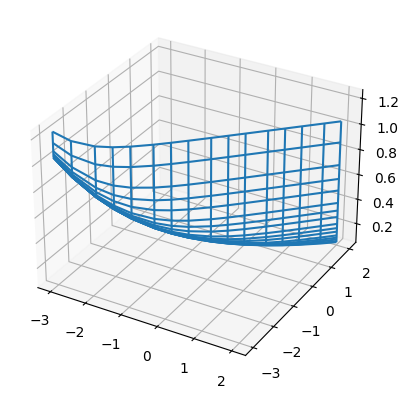

In [135]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)
dayxy=[]
for day in days:
    dayxy.append(days)
daysx=np.array(dayxy)
daysy=np.transpose(np.array(dayxy))
print(daysx)
print(daysy)
print(np.array(kappas))
# Plot a basic wireframe.
ax.plot_wireframe(np.log10(daysx), np.log10(daysx), np.array(kappas))
plt.show()

In [314]:
lampostStackthick=list((np.array([258,562,258,562,264,547,273,555,273,539])*1e-9))
lampN1,lampN2=2.74,1.45
print(int(len(lampostStackthick)/2)+1)
thick=lampostStackthick[int(len(lampostStackthick)/2)-1]##m , thickness of central layer, used for optimization/boost factor calculation
print(thick)
chirp=1.071
nLayers=12 # actual number of layers+2 (air and air)


6
2.6400000000000003e-07


In [315]:
lampWave,lampSol=rate.get_solution(lampN1,lampN2,chirp,thick,nLayers,tlist=lampostStackthick,isMirr=False)
lampMass=const.h*const.c/(lampWave*1e-9)*6.2*1e18


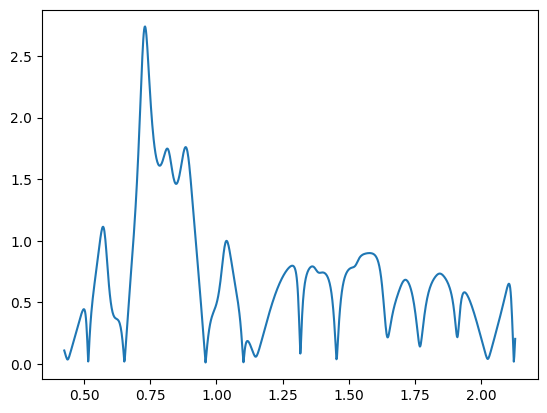

In [316]:
plt.plot(lampMass,lampSol)

In [317]:
N1=1.4656
N2=1.9166
GmirrStackNewfinal = np.loadtxt("measured-thickness-080821.txt",skiprows=1)[:,0]*1e-9 ## measured thicknesses
per85boost = np.load("boost-err-85per.npy") ## 85%ile boost factor
per15boost = np.load("boost-err-15per.npy")


thick=2.736840000000001e-07 ##m , thickness of central layer, used for optimization/boost factor calculation
chirp=1.071
nLayers=48 # actual number of layers+2 (air and air)

GmirrWaveNew,GmirrSolNew=rate.get_solution(N1,N2,chirp,thick,nLayers,tlist=GmirrStackNewfinal,isMirr=True)
GmirrMass=const.h*const.c/(GmirrWaveNew*1e-9)*6.2*1e18



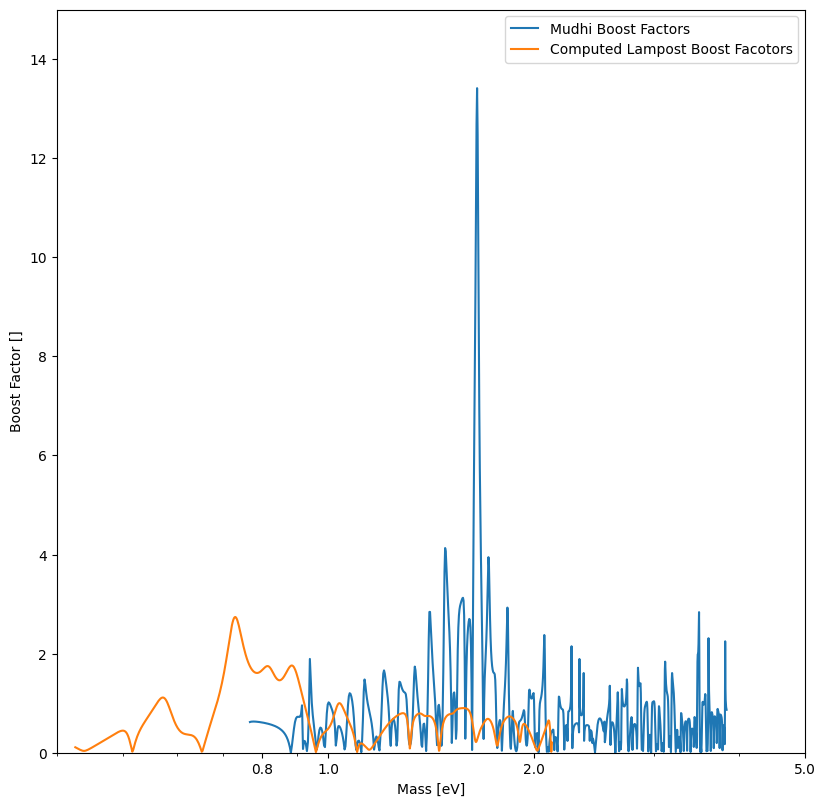

In [318]:
fig, ax = plt.subplots(figsize=(9.652,9.652))
ax.plot(GmirrMass,GmirrSolNew)
ax.plot(lampMass,lampSol)
ax.legend(["Mudhi Boost Factors","Computed Lampost Boost Facotors"])
ax.set_ylabel("Boost Factor []")
ax.set_xlabel("Mass [eV]")
ax.set_ylim(0,15)
ax.set_xlim(0.4,5)

ax.set_xscale('log')
ax.set_xticks([0.8,1,2, 5])
ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())


In [319]:
lampMuB=4/(180*60*60)
lampMu=5/(180*60*60)
lampdayson=180/24
lampMuS=dm_statistics.upper_limitB(lampMuB,lampdayson,lampdayson,plot=False,mu_=lampMu)


7.71604938271605e-06
6.172839506172839e-06
non0, noff0: 5.0 4.0
non, noff: 5.0 4.0
the signal at which the median no-signal dataset is excluded at 90% confidence is 5.059620142058139


In [324]:
energy=lampMass
AREA_DEFAULT = np.pi*(25 * 1e-3)**2
fDM=1
eta=0.002

kAnalytic = np.zeros(len(energy))
for j,e in enumerate(energy):
    kSquare =(5.05962/(AREA_DEFAULT*lampdayson))/( (5.2)* (lampSol[j]**2)* eta * 1e27 * fDM)*(1/e)
    kAnalytic[j]=np.sqrt(kSquare)


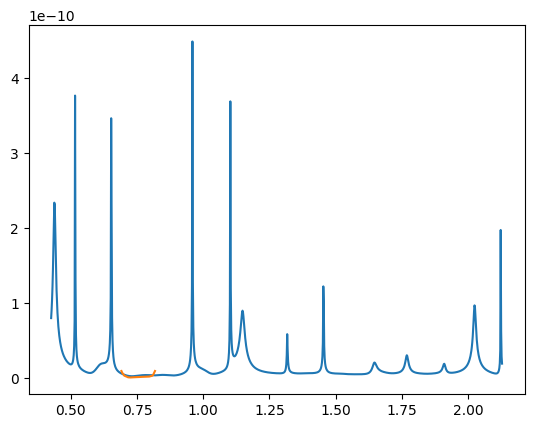

In [329]:

kappalampost=np.loadtxt("reference-exclusion-curves/chiles22-lampost.csv",delimiter=',')[:,1]
masslampost=np.loadtxt("reference-exclusion-curves/chiles22-lampost.csv",delimiter=',')[:,0]

plt.plot(energy,kAnalytic)
plt.plot(masslampost,kappalampost)

ax.legend(["Lampost Reported Limits","Computed Lampost Limits"])
ax.set_ylabel("Excluded $kappa$")
ax.set_xlabel("Mass [eV]")

ax.set_xlim(0.4,1)
ax.set_yscale("log")
ax.set_xscale('log')
ax.set_ylim(1e-12,1e-10)
ax.set_xticks([0.5,0.75,1])
ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())


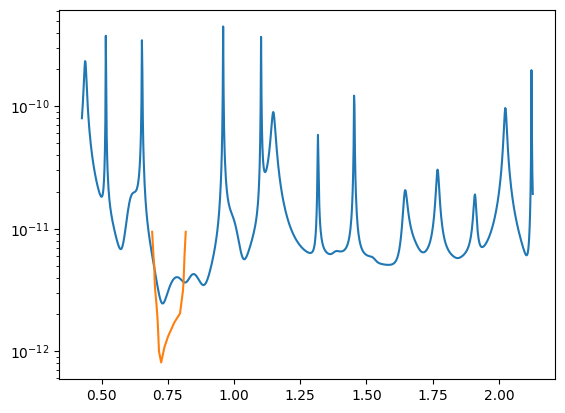

In [330]:
kappalampost=np.loadtxt("reference-exclusion-curves/chiles22-lampost.csv",delimiter=',')[:,1]
masslampost=np.loadtxt("reference-exclusion-curves/chiles22-lampost.csv",delimiter=',')[:,0]

plt.plot(energy,kAnalytic)
plt.plot(masslampost,kappalampost)
plt.yscale('log')